### Importing Modules 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


### Loading Dataset

In [14]:
size = 5000
dataframe = pd.read_csv("../../Datasets/"+str(size)+"dataset.csv")
dataframe


,is_malicious,658,2359,2360,613,930,637,623,642,2363,...,698,798,626,2375,640,578,691,32,681,sha
0,1,-0.654240,-0.260646,-0.143561,-0.198090,1.157200,0.558562,-0.534797,1.102865,-0.048695,...,0.060938,0.101269,0.069465,-0.014152,0.222049,-0.624826,0.340070,-0.146889,0.343746,851c1c68ce77ea256542f4b9a0b5f5240ba893e25793f0...
1,1,0.798335,-0.260646,-0.143561,-0.215691,-0.454051,0.558562,-0.534797,-0.906729,-0.048695,...,0.061939,0.145654,-0.282023,-0.014143,-1.135220,-0.430832,-0.185378,-0.442819,-0.242451,d420b98025b84150bad34dfaa23f164d8cb392b0b24ac5...
2,1,0.798335,-0.260646,-0.143561,-0.215691,1.157200,0.558562,-0.534797,-0.906729,-0.048695,...,0.061939,0.145654,-0.059747,-0.014149,-1.135220,-0.569915,-0.185378,-0.347080,-0.242451,c24e73acbc53e0776b5937077ac50dac4fc28793be673b...
3,0,-0.654240,0.793149,-0.139496,0.382767,-0.454051,-1.790311,1.869867,1.102865,0.097067,...,0.057934,0.123548,0.484353,-0.014142,1.579319,0.228457,-0.185378,0.040198,0.929943,293d8b3e1e6cab75efd5c24763427f613210d4dfecdd26...
4,1,0.798335,-0.260646,-0.143561,-0.215691,1.157200,0.558562,-0.534797,-0.906729,-0.048695,...,0.061939,0.145654,-1.081366,-0.014152,0.222049,-0.299002,0.340070,-0.271579,-0.242451,7551225755ec37521d0c6e15bad8ab9f806c4af7b9b7dd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.798335,0.164560,0.560006,-0.110081,-0.454051,0.558562,-0.534797,-0.906729,-0.048695,...,0.061939,0.145654,-0.101997,-0.014142,-1.135220,-0.079313,-0.185378,-0.262295,-0.242451,9c3b4470b7426ac4c6fc23136d0af8e801cb9af0147b30...
4996,0,0.798335,-0.260646,-0.143561,-0.215691,1.157200,0.558562,-0.534797,-0.906729,-0.048695,...,0.061939,0.145654,0.424987,-0.014152,-1.135220,-0.213667,0.340070,-0.128739,-0.242451,80d303cac0936a16bae673b0ab18767cf8cade686d5be4...
4997,0,-2.106814,-0.260646,-0.143561,-0.215691,-0.454051,-1.790311,-0.534797,1.102865,0.097067,...,0.050925,0.085101,2.400167,-0.014110,1.579319,0.749208,-0.185378,0.128762,3.274730,e5c4578e36ac8fa33e5da5ee3d5dcbb98ee05b67e617f2...
4998,0,-0.654240,0.685870,-0.143249,0.277156,-0.454051,-1.790311,1.869867,1.102865,0.048480,...,0.059936,0.136032,0.373989,-0.014147,0.222049,-0.241338,-0.185378,0.038518,0.929943,050074c6a7f1f577b3c9c704d385983eeb544c75096f75...


#### Data Analisys

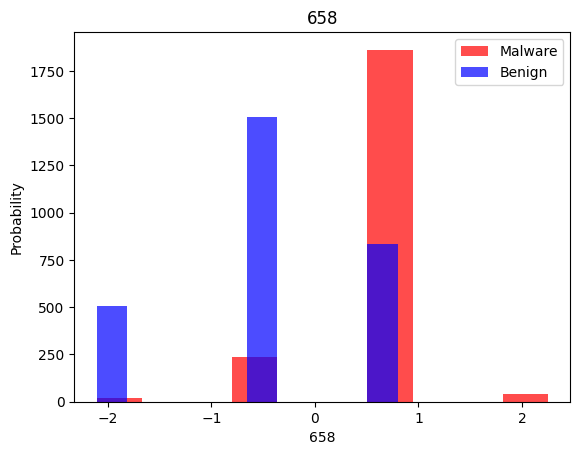

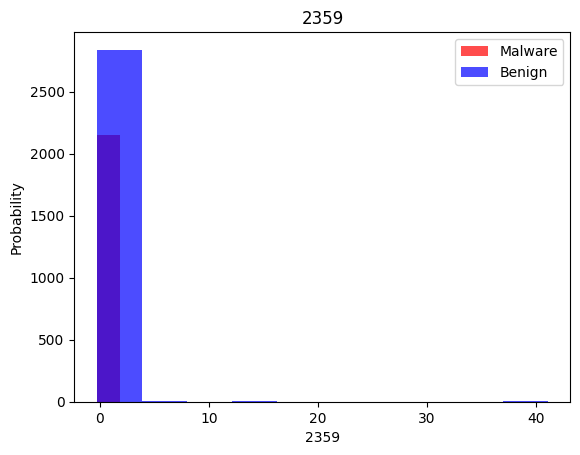

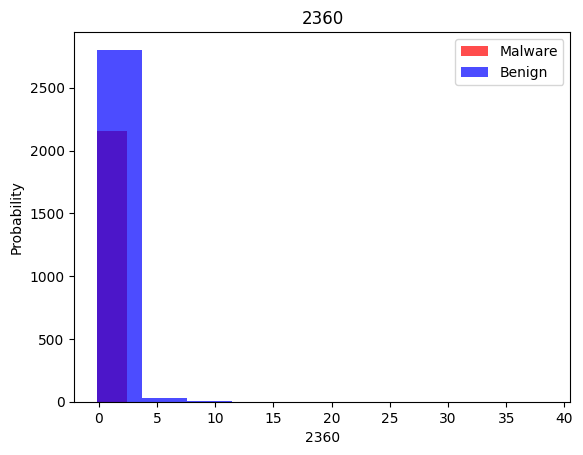

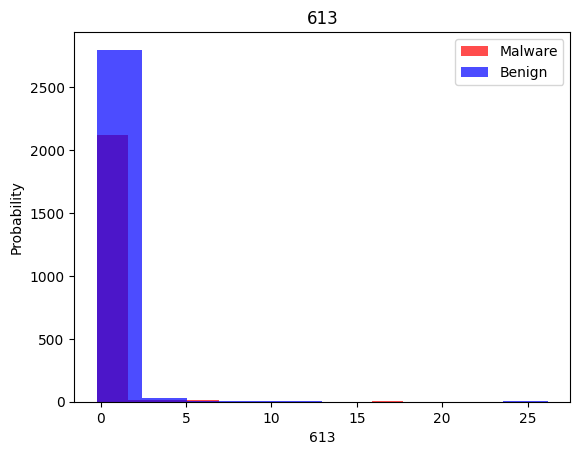

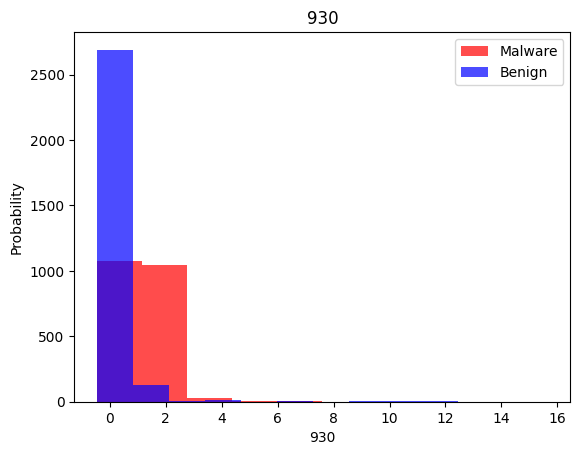

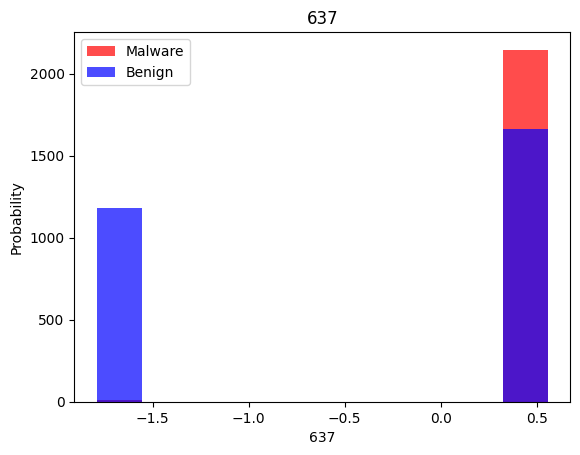

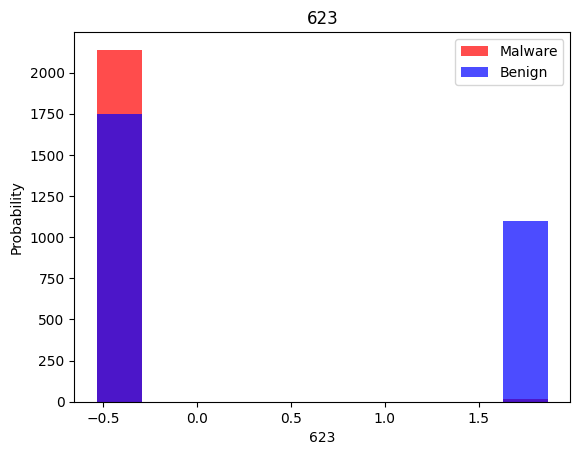

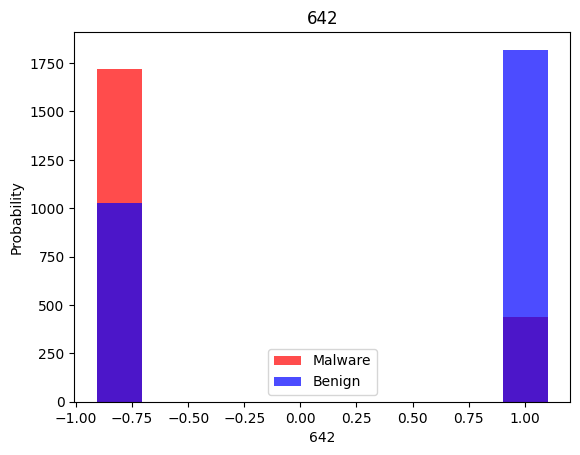

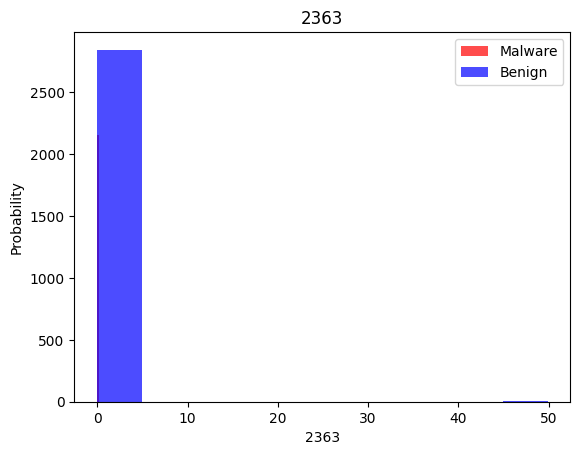

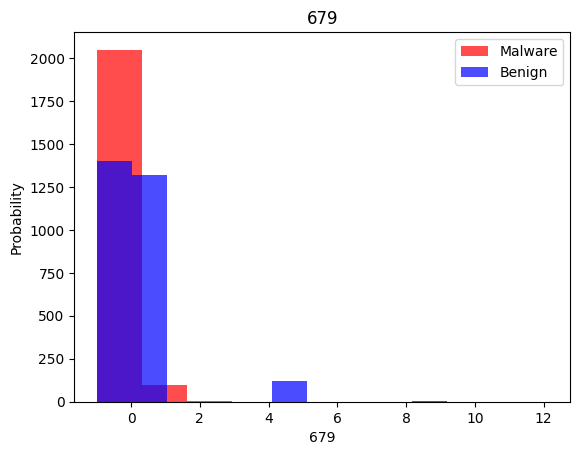

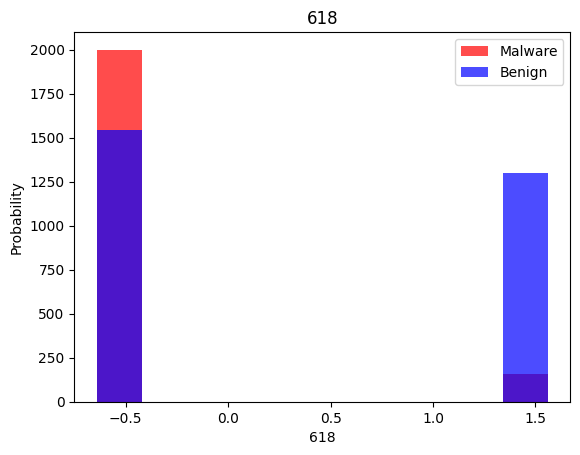

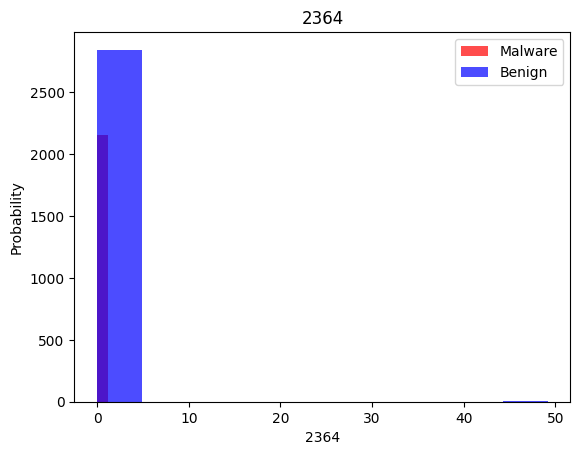

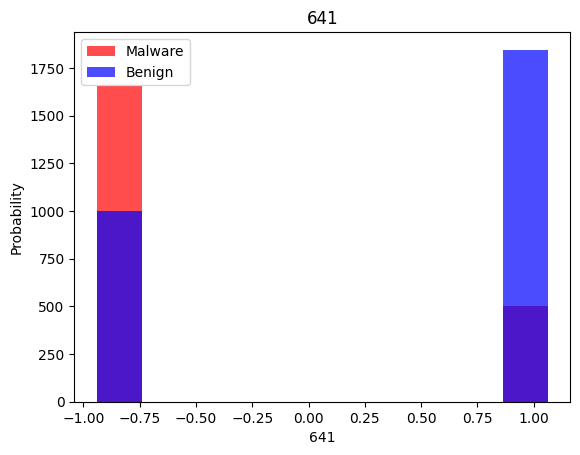

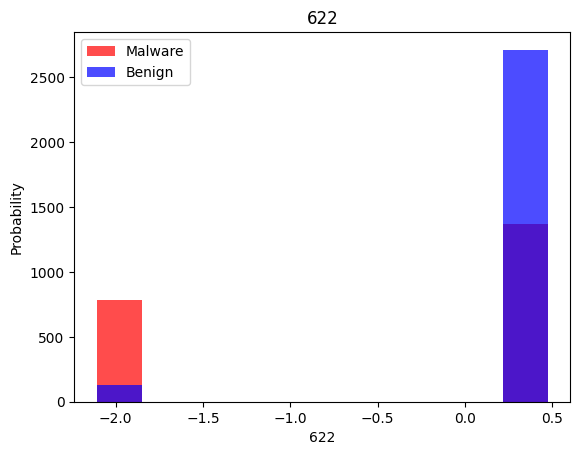

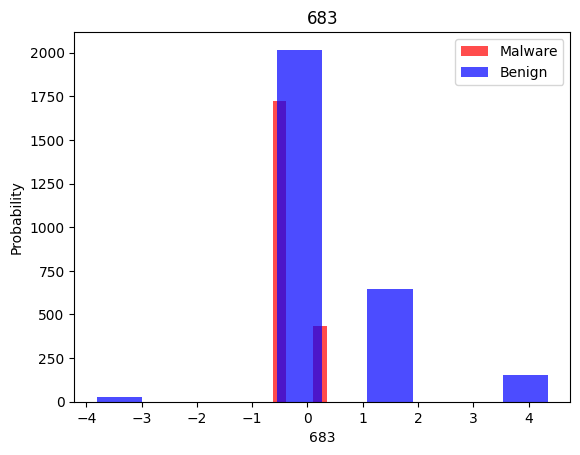

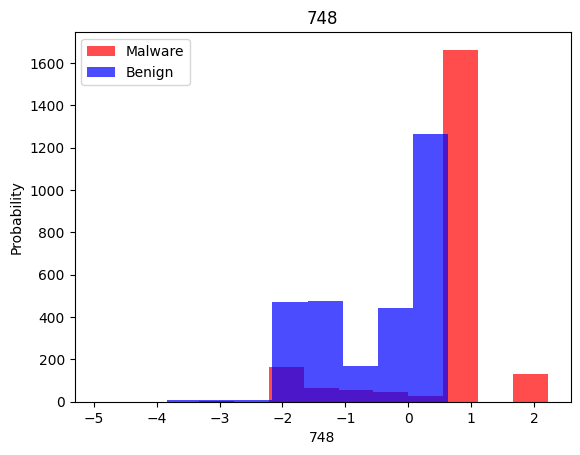

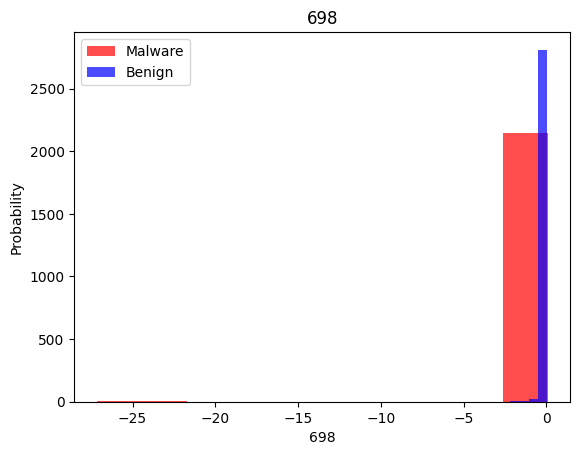

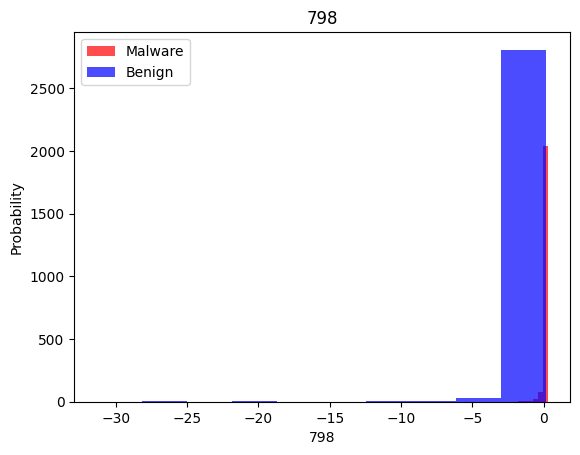

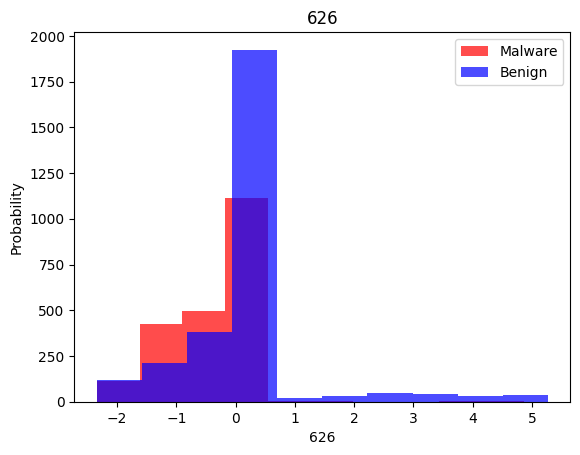

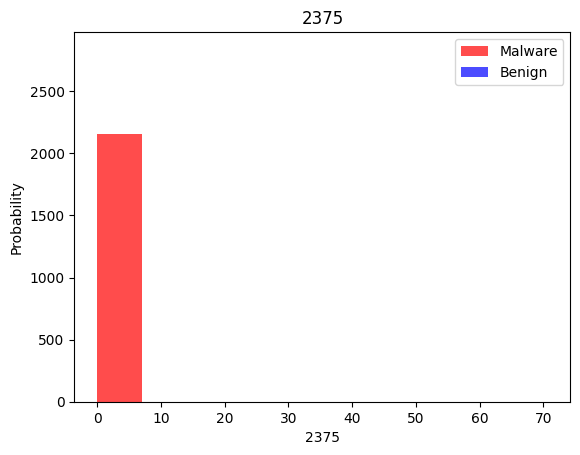

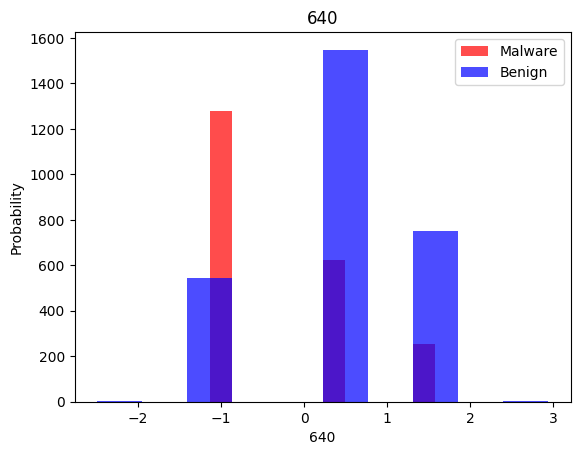

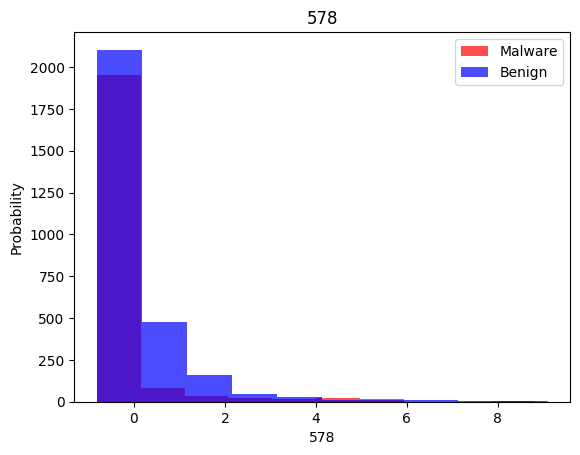

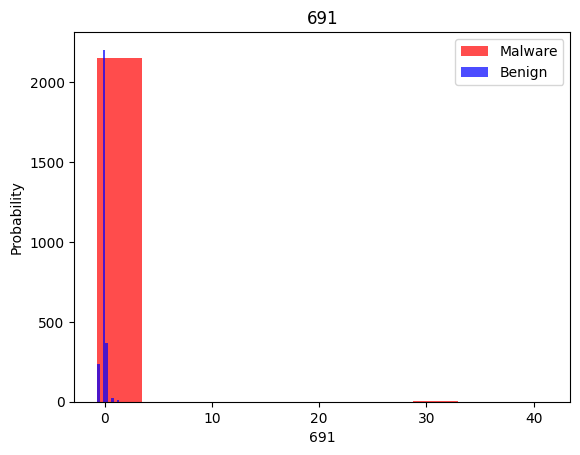

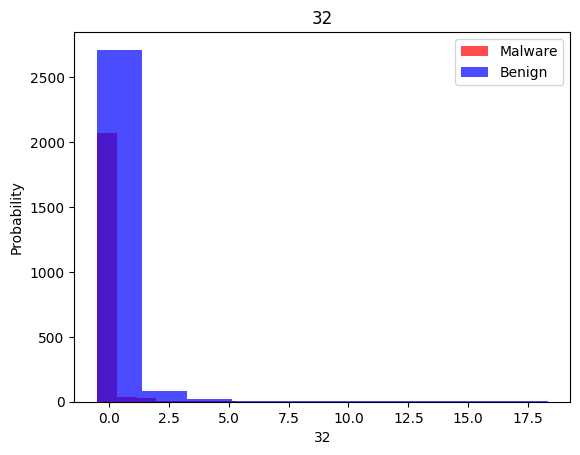

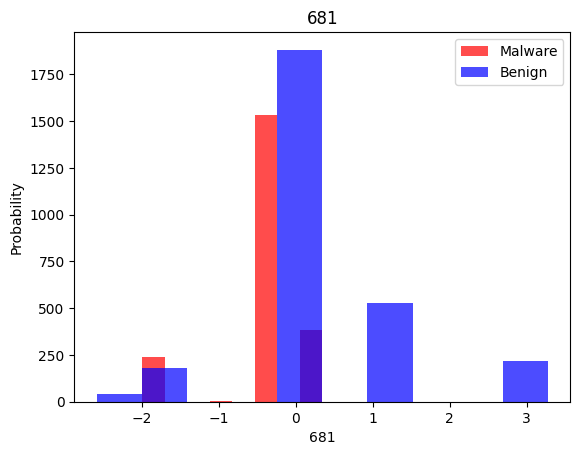

In [15]:
for feature in dataframe.columns[1:-1]:
    plt.hist(dataframe[dataframe["is_malicious"]==True][feature],color="red",label="Malware",alpha=0.7)
    plt.hist(dataframe[dataframe["is_malicious"]==False][feature],color="blue",label="Benign",alpha=0.7)
    plt.title(feature)
    plt.ylabel("Density")
    plt.xlabel(feature)
    plt.legend()
    plt.show()

#### Dataset setup

In [16]:
X = dataframe.iloc[:,1:-1]
y = dataframe.iloc[:,:1]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)



#### Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,np.ravel(y_train))
y_predicted = decision_tree_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       546
           1       0.96      0.94      0.95       454

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,np.ravel(y_train))
y_predicted = logistic_model.predict(X_test)


#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       540
           1       0.90      0.87      0.88       460

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



#### Support Vector Classifier

In [19]:
from sklearn.svm import SVC

svc_model = SVC(C=3)
svc_model.fit(X_train,np.ravel(y_train))
y_predicted = svc_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       548
           1       0.95      0.94      0.94       452

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,np.ravel(y_train))
y_predicted = rf_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       559
           1       0.96      0.97      0.96       441

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



#### Stacking

In [21]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("decision tees",decision_tree_model),
    ("logistic Regression",logistic_model),
    ("random forest",rf_model),
    ("svc",svc_model),
    
]

stacking_model = StackingClassifier(estimators=estimators)

stacking_model.fit(X_train,np.ravel(y_train))
y_predicted = stacking_model.predict(X_test)
print(classification_report(y_predicted, y_test))





              precision    recall  f1-score   support

           0       0.98      0.97      0.97       562
           1       0.96      0.97      0.96       438

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



#### K-fold Validation

In [22]:
score = cross_val_score(stacking_model,X_train,np.ravel(y_train),cv = 10,scoring="accuracy")
print(np.mean(score))

0.9712500000000001


In [23]:
test_score = cross_val_score(stacking_model,X_test,np.ravel(y_test),cv = 10,scoring="accuracy")
print(np.mean(test_score))

0.954


#### Exporting Classifier

In [24]:
import pickle

with open("../../Model/classifier.pkl","wb") as f:
    pickle.dump(stacking_model,f)